In [1]:
import pandas as pd

# ruta del archivo
file_path = '/content/POC Duplicidad de imágenes (1).xlsx'
df = pd.read_excel(file_path)

df.head()

SKU                                               Name  \
0  1067828492  Donkey Kong Country Tropical Freeze Edición Es...   
1  1100193261       Teclado gaming inalámbrico Logitech G915 TKL   
2  1069073693  Super Smash Bros Ultimate Estándar para Ninten...   
3  1097617844  Mouse inalámbrico Logitech Pebble M350 910-005773   
4  1093284182  Audífonos on - ear Astro A10 PS5 Alámbricos co...   

                                           Atributos  \
0  DetalleDelJuegoGPO|NumeroDeJugadoresVaD=3|Deta...   
1  CaracteristicasGPO|RetroiluminacionVaD=3|Detal...   
2  DetalleDelJuegoGPO|NumeroDeJugadoresVaD=3|Deta...   
3  EnergiaGPO|DuracionDeLaBateriaVaD=4|Energía|50...   
4  EnergiaGPO|DuracionDeLaBateriaVaD=4|Energía|7|...   

                                            Imagen 1  \
0  https://ss423.liverpool.com.mx/xl/1067828492_2...   
1  https://ss628.liverpool.com.mx/xl/1100193261_4...   
2   https://ss423.liverpool.com.mx/lg/1069073693.jpg   
3  https://ss628.liverpool.com.mx/xl/1097617844_4...   
4  https://ss423.liverpool.com.mx/xl/1093284182_4...   

                                            Imagen 2  \
0  https://ss423.liverpool.com.mx/xl/1067828492_1...   
1  https://ss628.liverpool.com.mx/xl/1100193261_5...   
2   https://ss423.liverpool.com.mx/sm/1069073693.jpg   
3  https://ss628.liverpool.com.mx/xl/1097617844_5...   
4  https://ss423.liverpool.com.mx/xl/1093284182_1...   

                                            Imagen 3  \
0  https://ss423.liverpool.com.mx/xl/1067828492_1...   
1  https://ss637.liverpool.com.mx/xl/1100193261_9...   
2  https://ss423.liverpool.com.mx/xl/1069073693_2...   
3  https://ss628.liverpool.com.mx/xl/1097617844_6...   
4  https://ss423.liverpool.com.mx/xl/1093284182_1...   

                                            Imagen 4  \
0  https://ss423.liverpool.com.mx/xl/1067828492_3...   
1   https://ss637.liverpool.com.mx/lg/1100193261.jpg   
2  https://ss423.liverpool.com.mx/xl/1069073693_1...   
3   https://ss637.liverpool.com.mx/lg/1097617844.jpg   
4  https://ss423.liverpool.com.mx/xl/1093284182_1...   

                                            Imagen 5  \
0  https://ss423.liverpool.com.mx/xl/1067828492_1...   
1  https://ss628.liverpool.com.mx/xl/1100193261_6...   
2  https://ss423.liverpool.com.mx/xl/1069073693_2...   
3   https://ss637.liverpool.com.mx/sm/1097617844.jpg   
4   https://ss423.liverpool.com.mx/lg/1093284182.jpg   

                                            Imagen 6  \
0   https://ss423.liverpool.com.mx/lg/1067828492.jpg   
1   https://ss637.liverpool.com.mx/sm/1100193261.jpg   
2  https://ss423.liverpool.com.mx/xl/1069073693_1...   
3  https://ss628.liverpool.com.mx/xl/1097617844_3...   
4   https://ss423.liverpool.com.mx/sm/1093284182.jpg   

                                            Imagen 7  ...  \
0  https://ss423.liverpool.com.mx/xl/1067828492_1...  ...   
1  https://ss637.liverpool.com.mx/xl/1100193261_7...  ...   
2  https://ss423.liverpool.com.mx/xl/1069073693_3...  ...   
3  https://ss628.liverpool.com.mx/xl/1097617844_1...  ...   
4  https://ss423.liverpool.com.mx/xl/1093284182_5...  ...   

                                           Imagen 20  \
0   https://ss423.liverpool.com.mx/xl/1067828492.jpg   
1   https://ss637.liverpool.com.mx/xl/1100193261.jpg   
2  https://ss423.liverpool.com.mx/xl/1069073693_3...   
3  https://ss637.liverpool.com.mx/xl/1097617844_2...   
4                                                NaN   

                                           Imagen 21  \
0  https://ss423.liverpool.com.mx/xl/1067828492_8...   
1  https://ss628.liverpool.com.mx/xl/1100193261_9...   
2  https://ss423.liverpool.com.mx/xl/1069073693_4...   
3   https://ss637.liverpool.com.mx/xl/1097617844.jpg   
4                                                NaN   

                                           Imagen 22  \
0  https://ss423.liverpool.com.mx/xl/1067828492_8...   
1  https://ss637.liverpool.com.mx/xl/1100193261_3...   
2                                

In [2]:
import requests
import os
from tqdm import tqdm

images_dir = 'imagenes_descargadas'
os.makedirs(images_dir, exist_ok=True)

def descargar_imagen(url, sku, index):
    """Descarga una imagen y la guarda con un nombre basado en el SKU y el índice."""
    img_path = os.path.join(images_dir, f"{sku}_{index}.jpg")
    try:
        response = requests.get(url, stream=True)
        if response.status_code == 200:
            with open(img_path, 'wb') as file:
                for chunk in response.iter_content(1024):
                    file.write(chunk)
        return img_path
    except Exception as e:
        print(f"Error descargando {url}: {e}")
        return None

imagenes_dict = {}

max_iters = 10
idx = 0
for _, row in tqdm(df.iterrows()):
    if idx >= max_iters:
        break
    idx += 1
    sku = row['SKU']
    imagenes_dict[sku] = []
    for i in range(1, 30):
        url = row.get(f'Imagen {i}')
        if pd.notna(url):  # Si la URL existe
            img_path = descargar_imagen(url, sku, i)
            if img_path:
                imagenes_dict[sku].append(img_path)

imagenes_dict

10it [00:28,  2.87s/it]


{1067828492: ['imagenes_descargadas/1067828492_1.jpg',
  'imagenes_descargadas/1067828492_2.jpg',
  'imagenes_descargadas/1067828492_3.jpg',
  'imagenes_descargadas/1067828492_4.jpg',
  'imagenes_descargadas/1067828492_5.jpg',
  'imagenes_descargadas/1067828492_6.jpg',
  'imagenes_descargadas/1067828492_7.jpg',
  'imagenes_descargadas/1067828492_8.jpg',
  'imagenes_descargadas/1067828492_9.jpg',
  'imagenes_descargadas/1067828492_10.jpg',
  'imagenes_descargadas/1067828492_11.jpg',
  'imagenes_descargadas/1067828492_12.jpg',
  'imagenes_descargadas/1067828492_13.jpg',
  'imagenes_descargadas/1067828492_14.jpg',
  'imagenes_descargadas/1067828492_15.jpg',
  'imagenes_descargadas/1067828492_16.jpg',
  'imagenes_descargadas/1067828492_17.jpg',
  'imagenes_descargadas/1067828492_18.jpg',
  'imagenes_descargadas/1067828492_19.jpg',
  'imagenes_descargadas/1067828492_20.jpg',
  'imagenes_descargadas/1067828492_21.jpg',
  'imagenes_descargadas/1067828492_22.jpg',
  'imagenes_descargadas/10678

In [3]:
from PIL import Image

def preprocesar_imagen(img_path, size=(224, 224)):
    """Redimensiona la imagen a un tamaño uniforme."""
    try:
        img = Image.open(img_path).convert("RGB")
        img = img.resize(size)
        return img
    except Exception as e:
        print(f"Error procesando {img_path}: {e}")
        return None

imagenes_procesadas = {sku: [preprocesar_imagen(img) for img in paths] for sku, paths in imagenes_dict.items()}
imagenes_procesadas

Error procesando imagenes_descargadas/1069073693_5.jpg: [Errno 2] No such file or directory: '/content/imagenes_descargadas/1069073693_5.jpg'
Error procesando imagenes_descargadas/1069073693_13.jpg: [Errno 2] No such file or directory: '/content/imagenes_descargadas/1069073693_13.jpg'
Error procesando imagenes_descargadas/1093284182_2.jpg: [Errno 2] No such file or directory: '/content/imagenes_descargadas/1093284182_2.jpg'
Error procesando imagenes_descargadas/1093284182_3.jpg: [Errno 2] No such file or directory: '/content/imagenes_descargadas/1093284182_3.jpg'
Error procesando imagenes_descargadas/1093284182_4.jpg: [Errno 2] No such file or directory: '/content/imagenes_descargadas/1093284182_4.jpg'
Error procesando imagenes_descargadas/1093284182_7.jpg: [Errno 2] No such file or directory: '/content/imagenes_descargadas/1093284182_7.jpg'
Error procesando imagenes_descargadas/1093284182_8.jpg: [Errno 2] No such file or directory: '/content/imagenes_descargadas/1093284182_8.jpg'
Erro

{1067828492: [<PIL.Image.Image image mode=RGB size=224x224>,
  <PIL.Image.Image image mode=RGB size=224x224>,
  <PIL.Image.Image image mode=RGB size=224x224>,
  <PIL.Image.Image image mode=RGB size=224x224>,
  <PIL.Image.Image image mode=RGB size=224x224>,
  <PIL.Image.Image image mode=RGB size=224x224>,
  <PIL.Image.Image image mode=RGB size=224x224>,
  <PIL.Image.Image image mode=RGB size=224x224>,
  <PIL.Image.Image image mode=RGB size=224x224>,
  <PIL.Image.Image image mode=RGB size=224x224>,
  <PIL.Image.Image image mode=RGB size=224x224>,
  <PIL.Image.Image image mode=RGB size=224x224>,
  <PIL.Image.Image image mode=RGB size=224x224>,
  <PIL.Image.Image image mode=RGB size=224x224>,
  <PIL.Image.Image image mode=RGB size=224x224>,
  <PIL.Image.Image image mode=RGB size=224x224>,
  <PIL.Image.Image image mode=RGB size=224x224>,
  <PIL.Image.Image image mode=RGB size=224x224>,
  <PIL.Image.Image image mode=RGB size=224x224>,
  <PIL.Image.Image image mode=RGB size=224x224>,
  <PIL.I

In [4]:
from transformers import CLIPProcessor, CLIPModel
import torch

# Cargar el modelo CLIP y el procesador
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

def obtener_embedding(imagen):
    """Genera el embedding de una imagen."""
    inputs = processor(images=imagen, return_tensors="pt")
    outputs = model.get_image_features(**inputs)

    return outputs / outputs.norm(dim=-1, keepdim=True)


embeddings_dict = {sku: [obtener_embedding(img) for img in imgs if img] for sku, imgs in imagenes_procesadas.items()}

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:99: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [5]:
from sklearn.metrics.pairwise import cosine_similarity

def detectar_duplicados(embeddings):
    """Calcula la similitud coseno entre embeddings y devuelve pares de imágenes duplicadas."""
    duplicados = []
    n = len(embeddings)
    for i in range(n):
        for j in range(i + 1, n):
            # Convertir a numpy después de separar del cálculo de gradientes
            similitud = cosine_similarity(
                embeddings[i].detach().cpu().numpy(),
                embeddings[j].detach().cpu().numpy()
            ).item()
            if similitud >= 0.9:  # Umbral de similitud
                duplicados.append((i, j, similitud))
    return duplicados


duplicados_dict = {sku: detectar_duplicados(embs) for sku, embs in embeddings_dict.items()}
duplicados_dict


{1067828492: [(0, 17, 1.0000001192092896),
  (1, 14, 0.9999999403953552),
  (2, 8, 0.9999998807907104),
  (3, 18, 1.0),
  (4, 20, 0.9087766408920288),
  (4, 21, 0.9087766408920288),
  (4, 22, 1.0),
  (5, 7, 0.9906715154647827),
  (5, 19, 0.9960833191871643),
  (7, 19, 0.985650897026062),
  (9, 13, 1.0),
  (9, 20, 0.9204232692718506),
  (9, 21, 0.9204232692718506),
  (10, 25, 0.9496791362762451),
  (10, 26, 0.9496791362762451),
  (11, 16, 0.9999999403953552),
  (12, 15, 1.0),
  (13, 20, 0.9204232692718506),
  (13, 21, 0.9204232692718506),
  (20, 21, 0.9999998807907104),
  (20, 22, 0.9087766408920288),
  (21, 22, 0.9087766408920288),
  (23, 24, 1.000000238418579),
  (25, 26, 1.0000001192092896)],
 1100193261: [(0, 24, 1.0),
  (1, 10, 1.000000238418579),
  (1, 25, 1.000000238418579),
  (2, 9, 1.0),
  (2, 20, 1.0),
  (3, 5, 0.977139949798584),
  (3, 19, 0.9972337484359741),
  (4, 11, 1.0000001192092896),
  (4, 13, 1.0000001192092896),
  (5, 19, 0.973995566368103),
  (6, 15, 1.0),
  (6, 17,

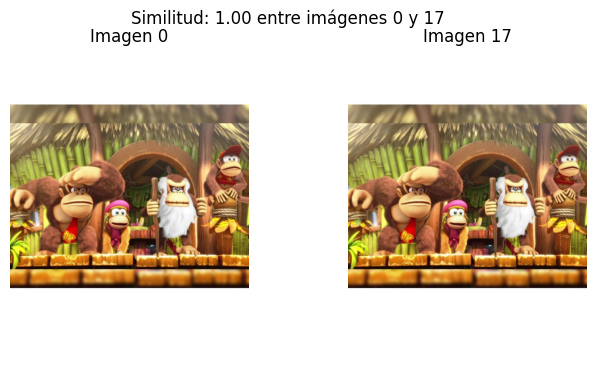

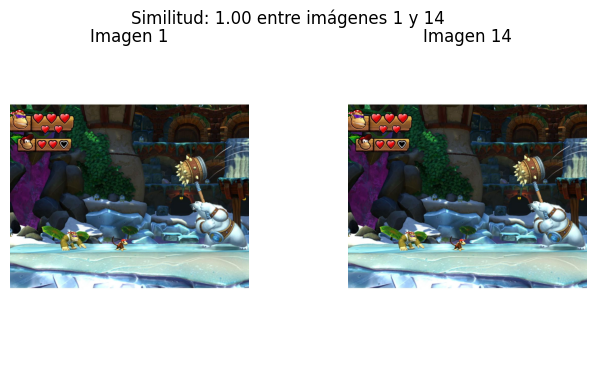

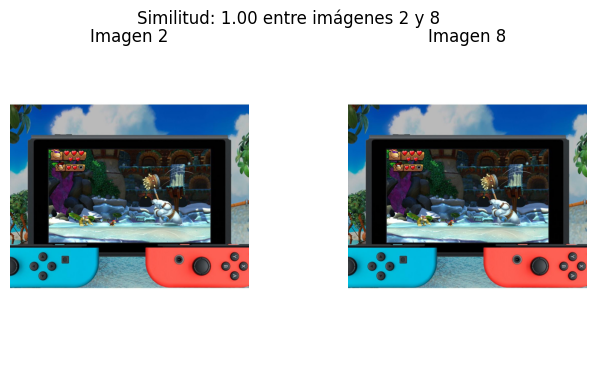

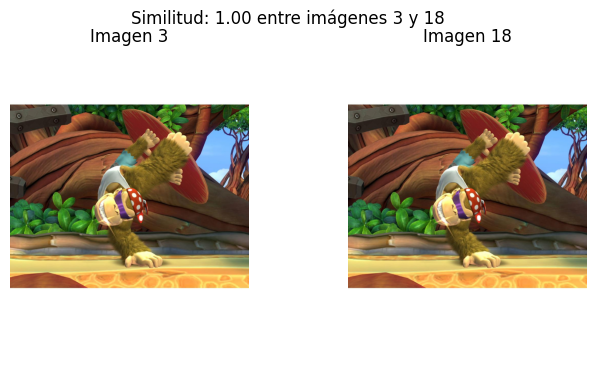

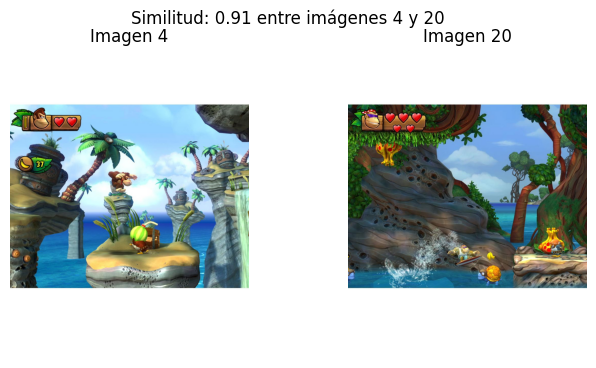

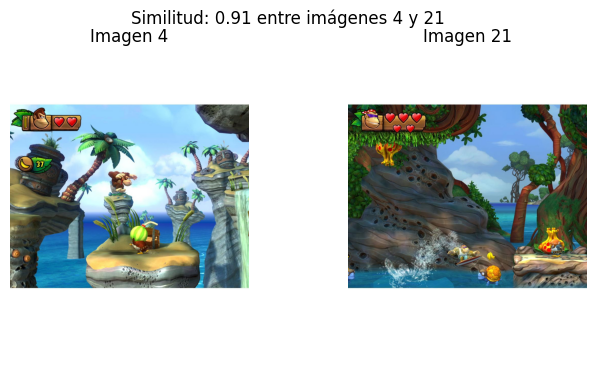

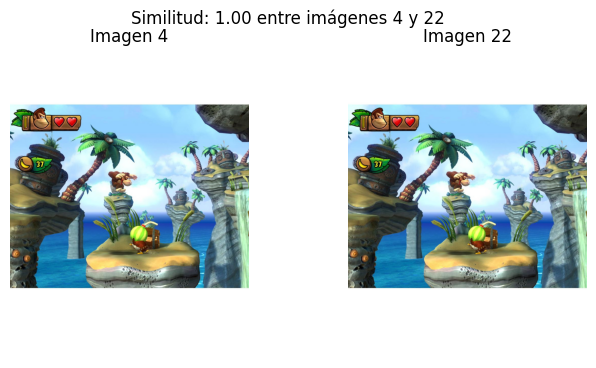

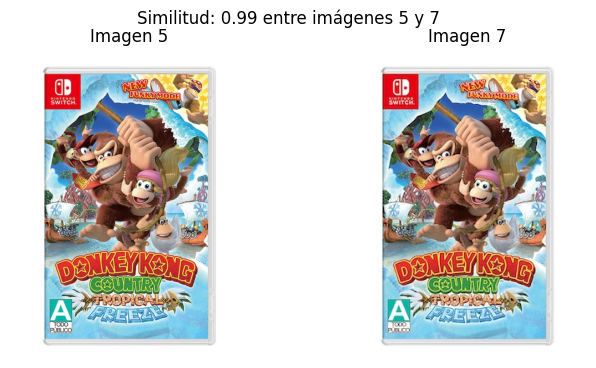

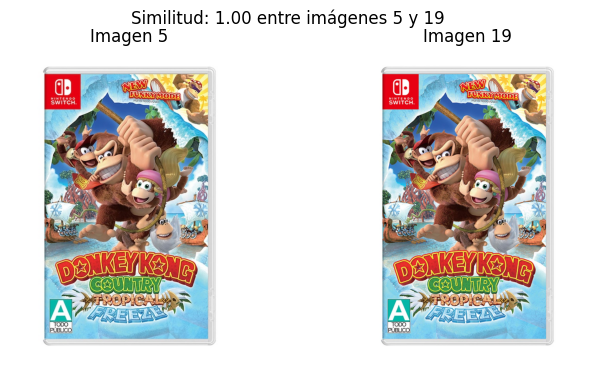

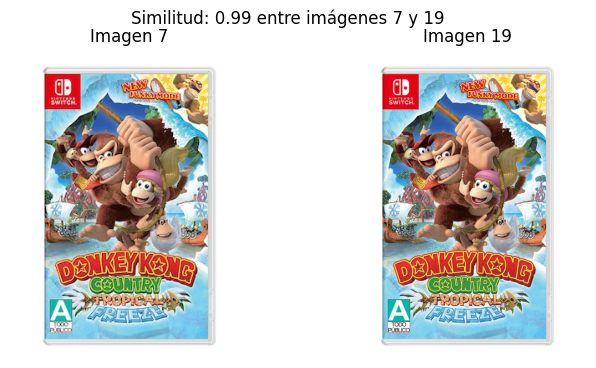

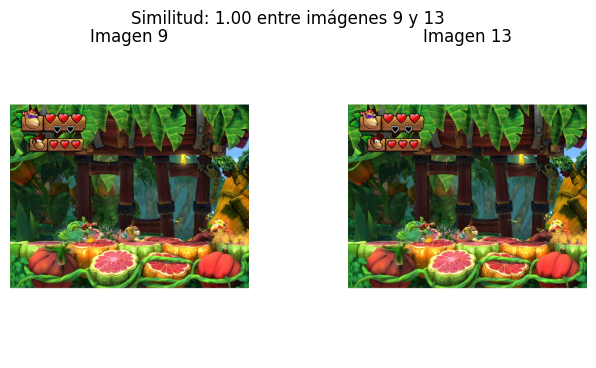

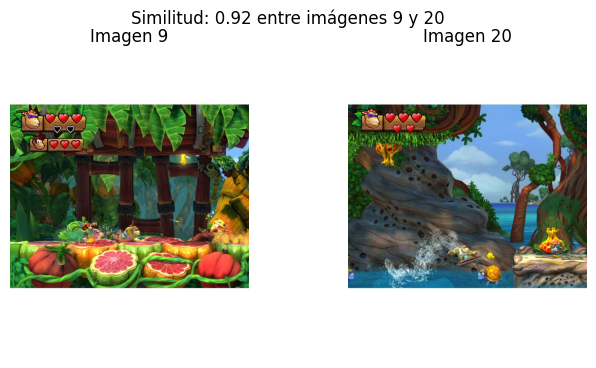

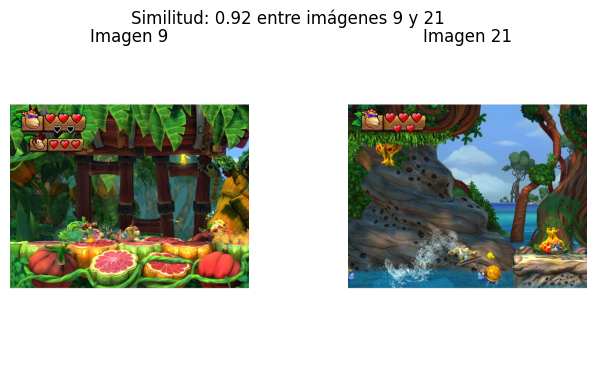

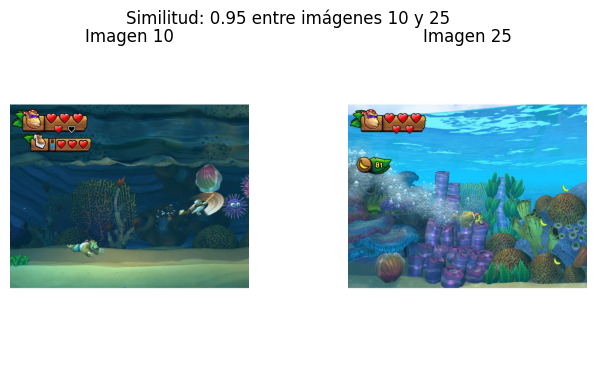

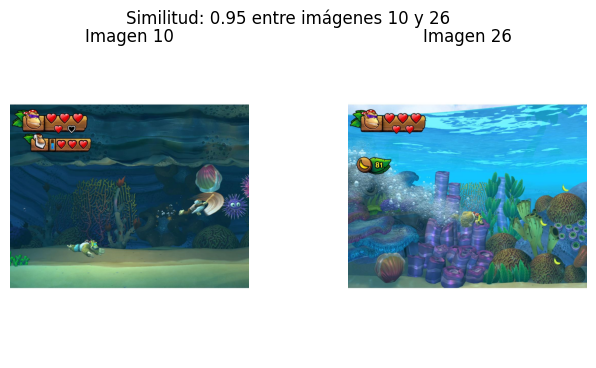

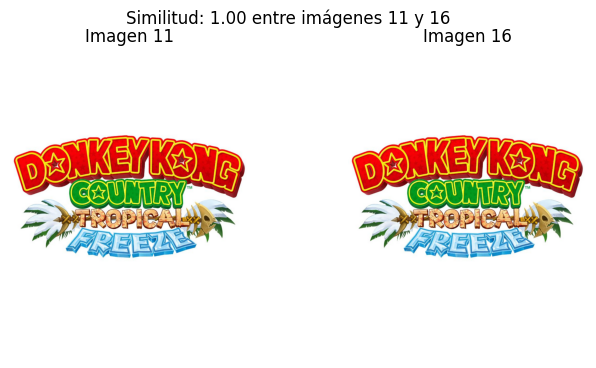

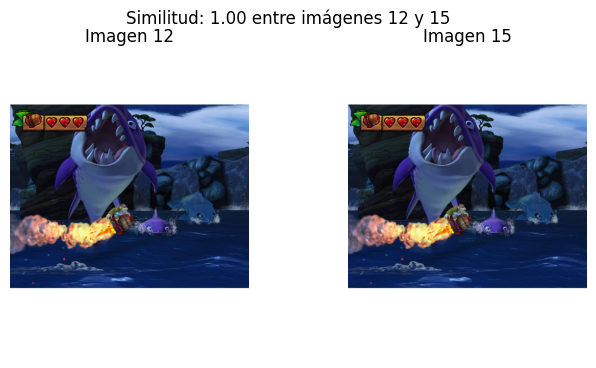

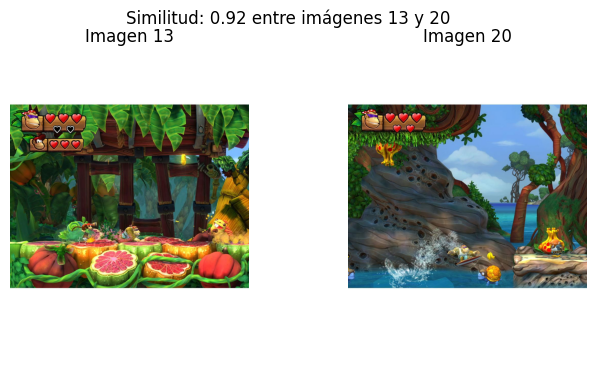

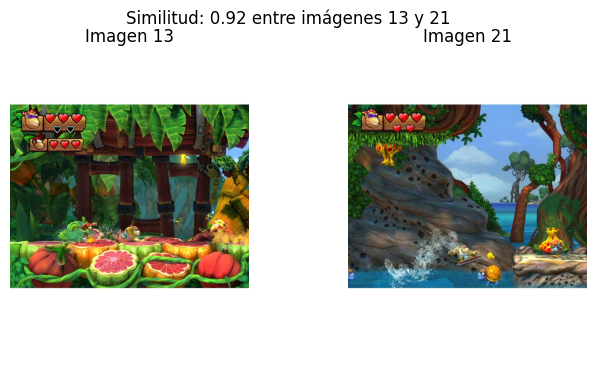

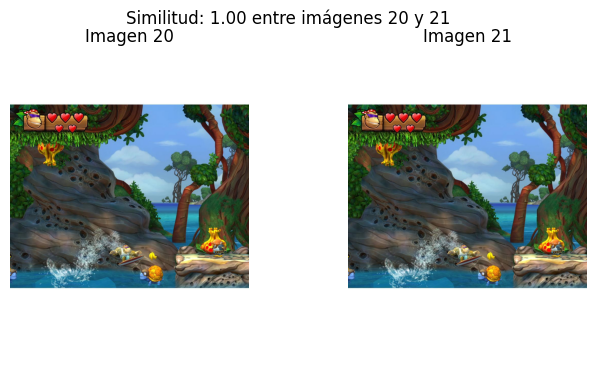

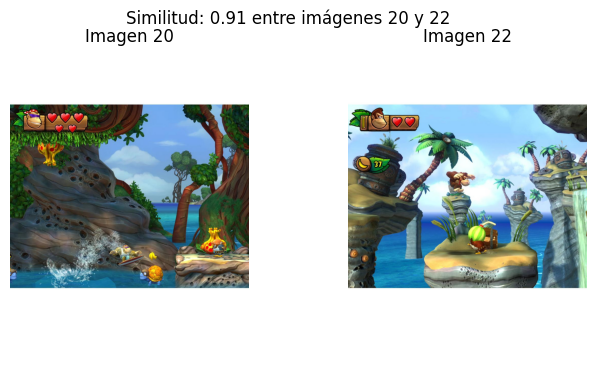

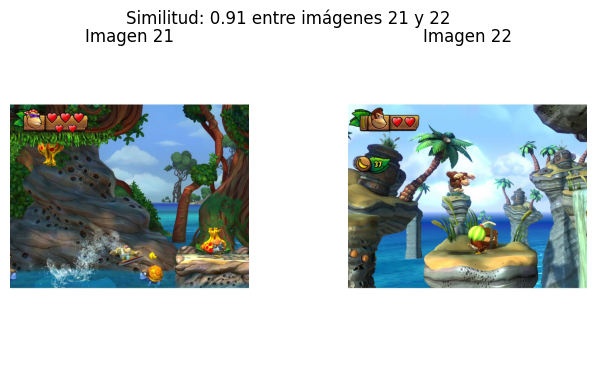

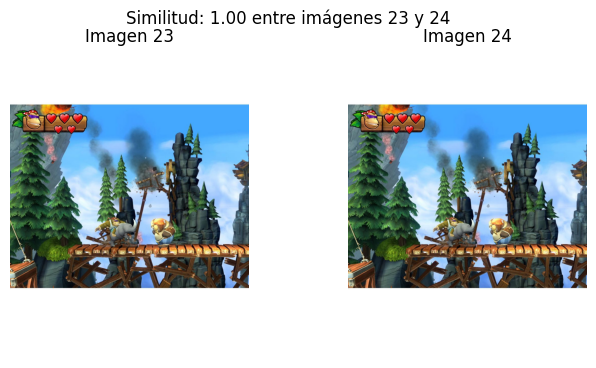

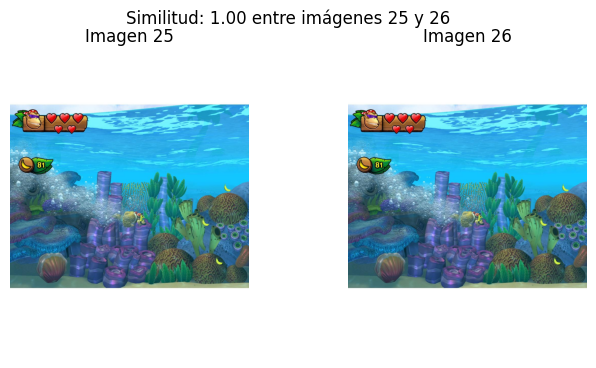

In [6]:
import matplotlib.pyplot as plt

def visualizar_duplicados(duplicados_dict, imagenes_dict, sku):
    """Muestra imágenes duplicadas para un SKU específico."""
    duplicados = duplicados_dict.get(sku, [])
    imagenes_sku = imagenes_dict.get(sku, [])

    for idx1, idx2, similitud in duplicados:
        img1 = Image.open(imagenes_sku[idx1])
        img2 = Image.open(imagenes_sku[idx2])

        fig, axes = plt.subplots(1, 2, figsize=(8, 4))
        fig.suptitle(f"Similitud: {similitud:.2f} entre imágenes {idx1} y {idx2}")

        axes[0].imshow(img1)
        axes[0].axis('off')
        axes[0].set_title(f"Imagen {idx1}")

        axes[1].imshow(img2)
        axes[1].axis('off')
        axes[1].set_title(f"Imagen {idx2}")

        plt.show()


sku = 1067828492
visualizar_duplicados(duplicados_dict, imagenes_dict, sku)
